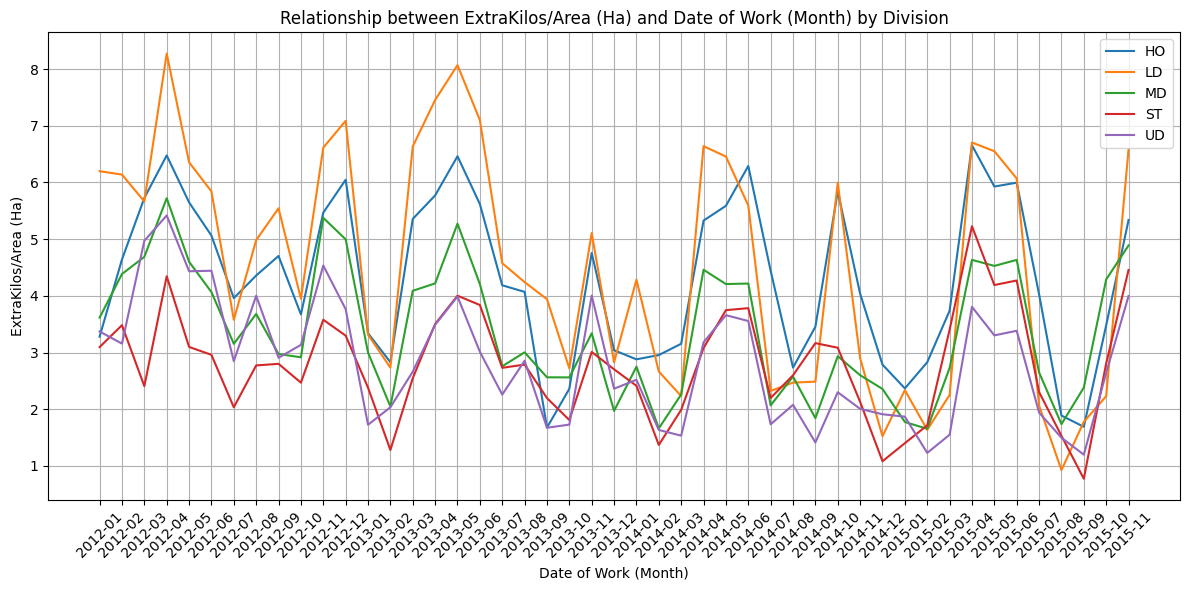

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/Merged_Fields_WorkDetails.csv")

# Convert the 'DateofWork' column to datetime
df['DateofWork'] = pd.to_datetime(df['DateofWork'])

# Create a new column for month
df['Month'] = df['DateofWork'].dt.to_period('M').dt.strftime('%Y-%m')

# Calculate "ExtraKilos/Area (Ha)" value
df['ExtraKilos_Per_Area'] = df['ExtraKilos'] / df['Area (Ha)']

# Group by 'Division' and 'Month' and calculate the mean "ExtraKilos/Area (Ha)"
grouped = df.groupby(['Division', 'Month'])['ExtraKilos_Per_Area'].mean().reset_index()

# Create a line chart for each division
plt.figure(figsize=(12, 6))
for division in grouped['Division'].unique():
    data = grouped[grouped['Division'] == division]
    plt.plot(data['Month'], data['ExtraKilos_Per_Area'], label=division)

# Set x-axis label and ticks
plt.xlabel("Date of Work (Month)")
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel("ExtraKilos/Area (Ha)")

# Show legend
plt.legend()

# Show the plot
plt.title("Relationship between ExtraKilos/Area (Ha) and Date of Work (Month) by Division")
plt.grid(True)
plt.tight_layout()

plt.savefig('Relationship between ExtraKilos-Area (Ha) and Date of Work (Month) by Division')
plt.show()
